<a href="https://colab.research.google.com/github/imsumin018/daily-code-snippet/blob/main/credit_card_fraud_detection_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPool1D, Dropout, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, precision_recall_curve

In [ ]:
# Load the dataset
dataset = pd.read_csv('./creditcard.csv')

# Data Analysis

In [ ]:
# Display basic information about the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180351 entries, 0 to 180350
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    180351 non-null  float64
 1   V1      180351 non-null  float64
 2   V2      180351 non-null  float64
 3   V3      180351 non-null  float64
 4   V4      180351 non-null  float64
 5   V5      180351 non-null  float64
 6   V6      180351 non-null  float64
 7   V7      180351 non-null  float64
 8   V8      180351 non-null  float64
 9   V9      180350 non-null  float64
 10  V10     180350 non-null  float64
 11  V11     180350 non-null  float64
 12  V12     180350 non-null  float64
 13  V13     180350 non-null  float64
 14  V14     180350 non-null  float64
 15  V15     180350 non-null  float64
 16  V16     180350 non-null  float64
 17  V17     180350 non-null  float64
 18  V18     180350 non-null  float64
 19  V19     180350 non-null  float64
 20  V20     180350 non-null  float64
 21  V21     18

In [ ]:
# Display the first few rows of the dataset
print(dataset.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
# Display class distribution
print(dataset['Class'].value_counts())

0.0    179986
1.0       364
Name: Class, dtype: int64


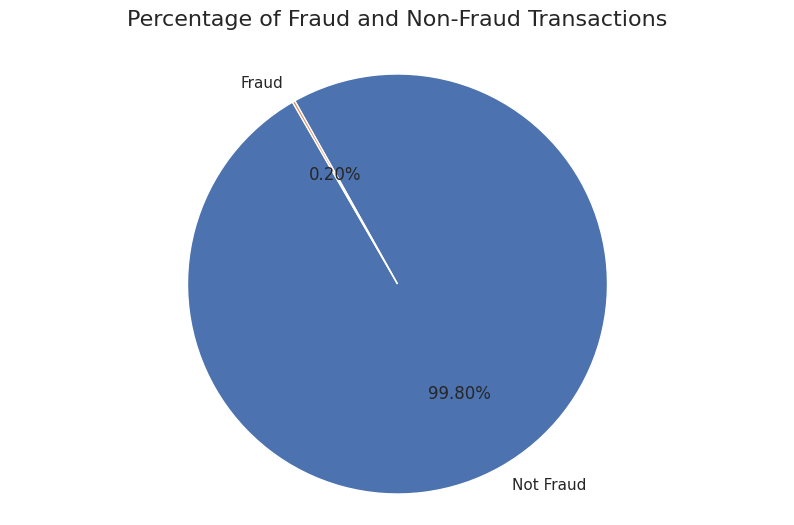

In [ ]:
# Visualize the percentage of Fraud and Non-Fraud transactions
labels = 'Not Fraud', 'Fraud'
sizes = [dataset.Class[dataset['Class'] == 0].count(), dataset.Class[dataset['Class'] == 1].count()]
fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=False, startangle=120)
ax1.axis('equal')
title = "Percentage of Fraud and Non-Fraud Transactions"
plt.title(title, size=16, pad=20)
plt.show()

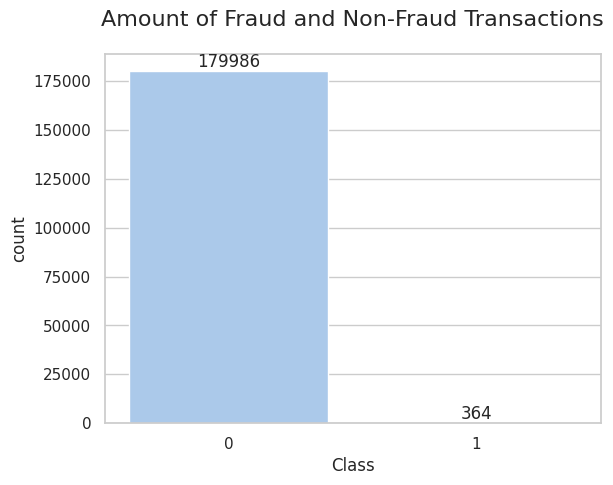

In [ ]:
# Visualize the amount of Fraud and Non-Fraud transactions
sns.set(style="whitegrid")
ax = sns.countplot(x='Class', data=dataset, order=[0, 1], label='Count', palette='pastel')
counts = dataset['Class'].value_counts()
for i, count in enumerate(counts):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=12)
title = "Amount of Fraud and Non-Fraud Transactions"
ax.set_title(title, size=16)
plt.title(title, size=16, pad=20)
plt.show()

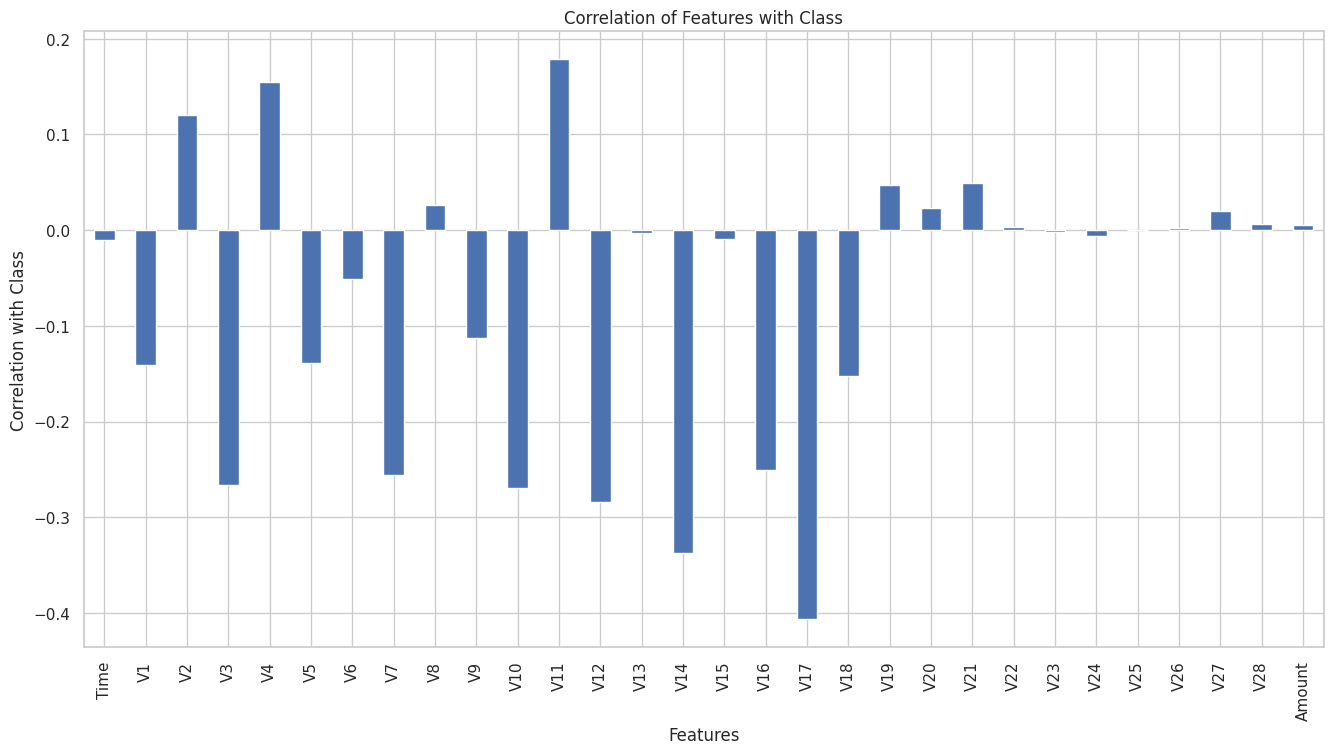

In [ ]:
# Correlation Diagram
dataset_2 = dataset.drop(columns=['Class'])
correlation_with_class = dataset_2.corrwith(dataset['Class'])
correlation_with_class.plot.bar(figsize=(16, 8), grid=True)
plt.xlabel("Features")
plt.ylabel("Correlation with Class")
plt.title("Correlation of Features with Class")
plt.show()

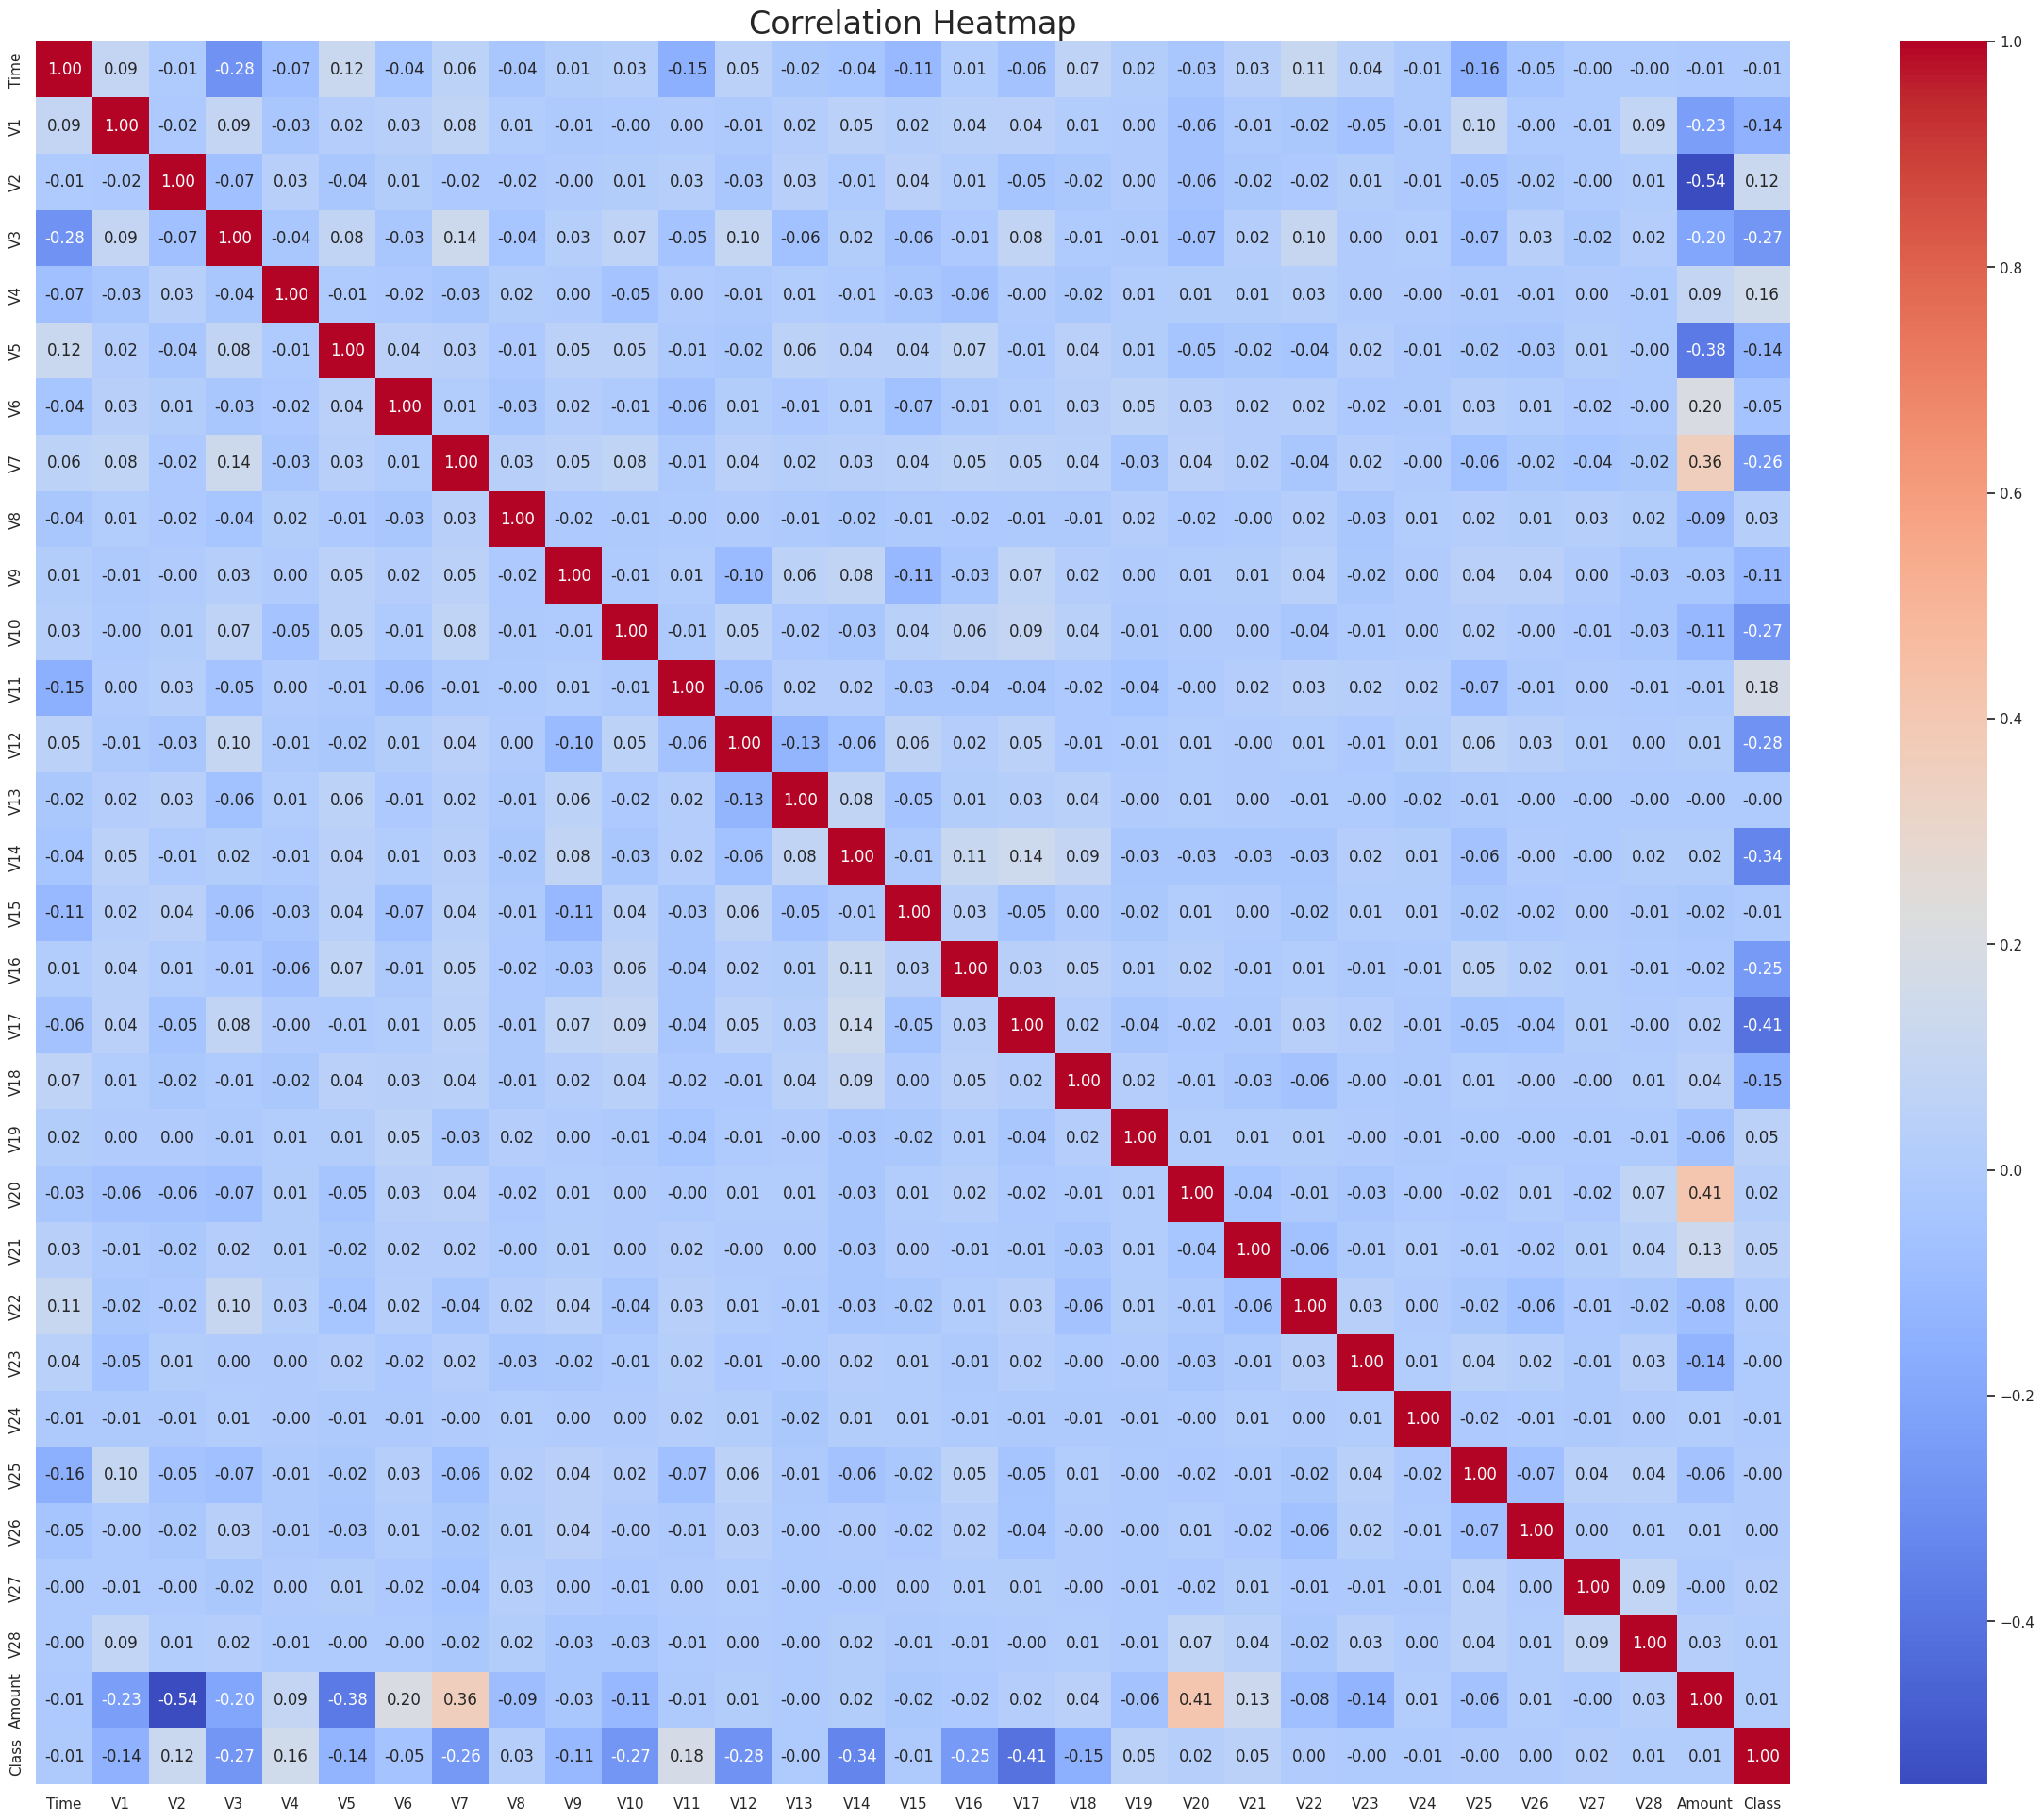

In [ ]:
# Heatmap
corr = dataset.corr()
plt.figure(figsize=(30, 24))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap", fontsize=24)
plt.show()

# Data Engineering

In [ ]:
# Splitting the data
x = dataset.drop(columns=['Class'])  # Features
y = dataset['Class']  # Target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
# Data Scaling

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Building the Model

In [ ]:
# Model architecture
model = Sequential([
    Conv1D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(30, 1)),
    BatchNormalization(),
    MaxPool1D(pool_size=2),
    Dropout(0.2),

    Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPool1D(pool_size=2),
    Dropout(0.3),

    Flatten(),

    Dense(units=64, activation='relu'),
    Dropout(0.3),

    Dense(units=1, activation='sigmoid')
])

In [ ]:
# Compile the model
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/10
4509/4509 [==============================] - 34s 7ms/step - loss: nan - accuracy: 0.9935 - val_loss: nan - val_accuracy: 0.9979
Epoch 2/10
4509/4509 [==============================] - 36s 8ms/step - loss: nan - accuracy: 0.9980 - val_loss: nan - val_accuracy: 0.9979
Epoch 3/10
4509/4509 [==============================] - 30s 7ms/step - loss: nan - accuracy: 0.9980 - val_loss: nan - val_accuracy: 0.9979
Epoch 4/10
4509/4509 [==============================] - 33s 7ms/step - loss: nan - accuracy: 0.9980 - val_loss: nan - val_accuracy: 0.9979
Epoch 5/10
4509/4509 [==============================] - 32s 7ms/step - loss: nan - accuracy: 0.9980 - val_loss: nan - val_accuracy: 0.9979


# Data Evaluation

In [ ]:
# Evaluation
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

1128/1128 [==============================] - 3s 2ms/step - loss: nan - accuracy: 0.9979
Test Loss: nan
Test Accuracy: 0.9979484677314758


In [ ]:
# Predictions and evaluation metrics
y_pred_prob = model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

1128/1128 [==============================] - 3s 2ms/step


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[35997     0]
 [   74     0]]


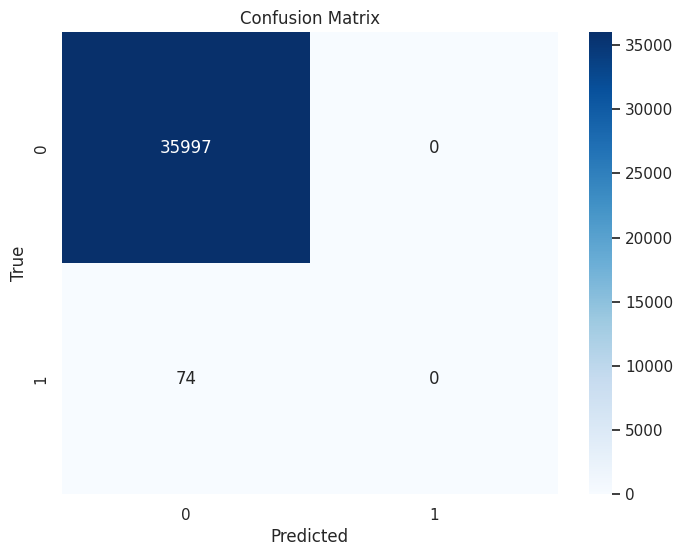

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [ ]:
# Accuracy Score
acc_cm = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_cm)

Accuracy: 0.9979484904771145


In [ ]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     35997
         1.0       0.00      0.00      0.00        74

    accuracy                           1.00     36071
   macro avg       0.50      0.50      0.50     36071
weighted avg       1.00      1.00      1.00     36071



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
y_test= y_test[~np.isnan(y_test)]
y_pred_prob = y_pred_prob[~np.isnan(y_pred_prob)]

In [ ]:
y_pred_prob

array([], dtype=float32)

In [ ]:
len(y_test)

36071

In [ ]:
y_test

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
print("AUC Score:", roc_auc)

ValueError: ignored

In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

ValueError: ignored

In [ ]:
# First Layer:

cnn = Sequential()
cnn.add(Conv1D(32, 2, activation = "relu", input_shape = (30,1)))
cnn.add(Dropout(0.1))
# Second Layer:

cnn.add(BatchNormalization()) # Batch normalization is a technique for training very deep neural networks
                               # that standardizes the inputs to a layer for each mini-batch. This
                               # has the effect of stabilizing the learning process and dramatically
                               # reducing the number of training epochs required to train deep networks

cnn.add(Conv1D(64, 2, activation = "relu"))
cnn.add(Dropout(0.2))          # prevents over-fitting (randomly remove some neurons)
# Flattening Layer:

cnn.add(Flatten())
cnn.add(Dropout(0.4))
cnn.add(Dense(64, activation = "relu"))
cnn.add(Dropout(0.5))
# Last Layer:

cnn.add(Dense(1, activation = "sigmoid"))
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 29, 32)            96        
                                                                 
 dropout_6 (Dropout)         (None, 29, 32)            0         
                                                                 
 batch_normalization_4 (Bat  (None, 29, 32)            128       
 chNormalization)                                                
                                                                 
 conv1d_5 (Conv1D)           (None, 28, 64)            4160      
                                                                 
 dropout_7 (Dropout)         (None, 28, 64)            0         
                                                                 
 flatten_2 (Flatten)         (None, 1792)              0         
                                                      

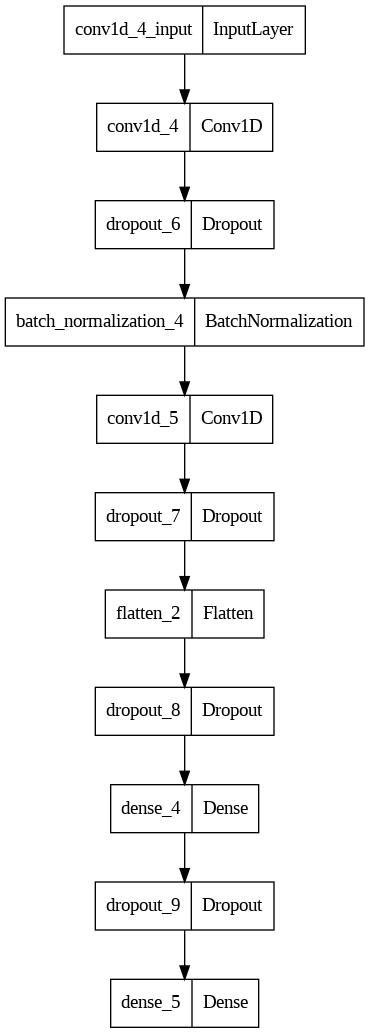

In [ ]:
from keras.utils import plot_model
plot_model(cnn)

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
cnn.compile(optimizer = Adam(lr=0.0001), loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [ ]:
scaler = StandardScaler()
scaled_xtrain = scaler.fit_transform(xtrain)
scaled_xtest = scaler.fit_transform(xtest)

In [ ]:
scaled_xtrain3d = scaled_xtrain.reshape(scaled_xtrain.shape[0],scaled_xtrain.shape[1],1)
scaled_xtest3d = scaled_xtest.reshape(scaled_xtest.shape[0],scaled_xtest.shape[1],1)

scaled_xtrain3d.shape, scaled_xtest3d.shape

((144280, 30, 1), (36071, 30, 1))

In [ ]:
history = cnn.fit(scaled_xtrain3d, ytrain, epochs = 20, validation_data=(scaled_xtest3d, ytest), verbose=1)

Epoch 1/20
4509/4509 [==============================] - 48s 10ms/step - loss: 0.0083 - accuracy: 0.9988 - val_loss: nan - val_accuracy: 0.9991
Epoch 2/20
4509/4509 [==============================] - 44s 10ms/step - loss: 0.0053 - accuracy: 0.9990 - val_loss: nan - val_accuracy: 0.9991
Epoch 3/20
4509/4509 [==============================] - 45s 10ms/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: nan - val_accuracy: 0.9990
Epoch 4/20
4509/4509 [==============================] - 45s 10ms/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: nan - val_accuracy: 0.9991
Epoch 5/20
4509/4509 [==============================] - 46s 10ms/step - loss: 0.0048 - accuracy: 0.9992 - val_loss: nan - val_accuracy: 0.9991
Epoch 6/20
4509/4509 [==============================] - 44s 10ms/step - loss: 0.0049 - accuracy: 0.9991 - val_loss: nan - val_accuracy: 0.9991
Epoch 7/20
4509/4509 [==============================] - 47s 10ms/step - loss: 0.0050 - accuracy: 0.9991 - val_loss: nan - val_accuracy: 0.9991

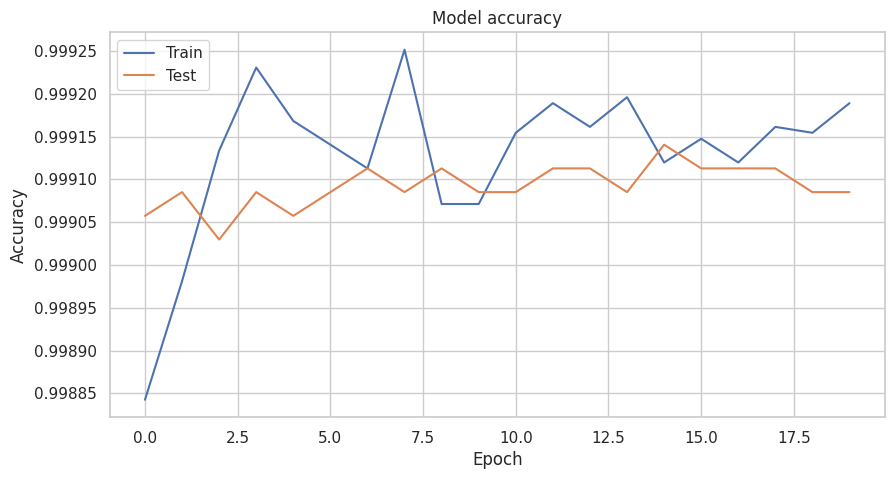

In [ ]:
fig, ax1 = plt.subplots(figsize= (10, 5))
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

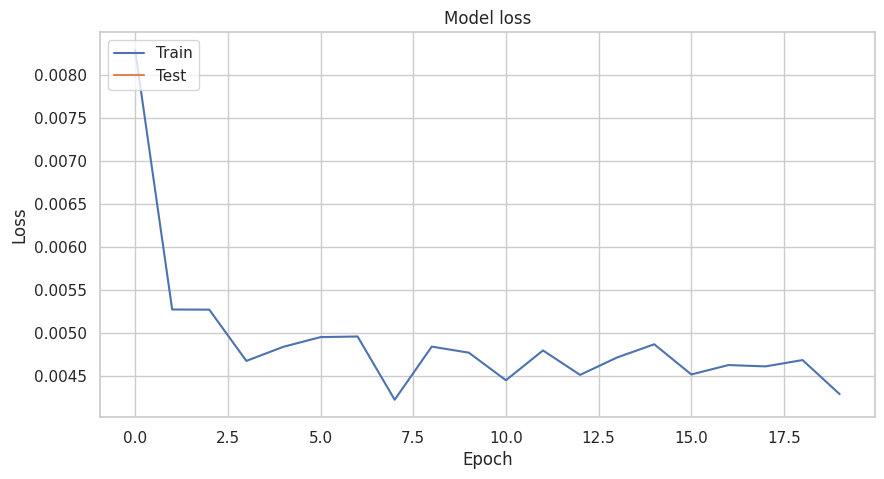

In [ ]:
fig, ax1 = plt.subplots(figsize= (10, 5))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Test"], loc = "upper left")
plt.show()

In [ ]:
type(ytest)

pandas.core.series.Series